# Data Understanding

(This document relates to question number 2)

- What pedagogical strategies developed by teachers seem to promote better reading performance (PISA 2018 - teacher context data)?
- What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?
- Do teachers and students have the same perceptions?

## **2.1 Collect Initial Data**

For this question we're using 2 datasets (https://www.oecd.org/en/data/datasets/pisa-2022-database.html):
- Students database 2018 (PISA)
- Teachers database 2018 (PISA)

this file only uses the students, for the teacher section see ([Data Understanding - Teacher](./data_understanding_teacher.ipynb))

The source datasets are in .sas7bdat format, that we converted to .csv with the following command:

In [163]:
"""
data = pd.read_sas(
    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/student2018.csv", index=False)

data = pd.read_sas(
    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"
)

data.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)
"""

'\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_stu_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/student2018.csv", index=False)\n\ndata = pd.read_sas(\n    "../../../databases/2018/cy07_msu_tch_qqq.sas7bdat", format="sas7bdat"\n)\n\ndata.to_csv("../../../databases/2018/only_teacher2018.csv", index=False)\n'

In [164]:
import pandas as pd

student = pd.read_csv('../../../databases/2018/student2018.csv', nrows=1000)
# student = pd.read_csv('../../../databases/2018/student2018.csv')

**Note:** We don't include these files in the project folder, so it's necessary to manually download and put them in their respective folder.

## **2.2 Describe Data**

#### Student Data

The original dataset has 1119 features

In [165]:
student.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,i
0,8.0,b'ALB',800115.0,800001.0,b'07MS',b'000800',b'ALB0107',b'0080000',0.0,2.0,...,325.281,370.041,358.524,345.833,380.064,357.376,385.496,0.48064,b' 09MAY19:11:20:53',31.0
1,8.0,b'ALB',800300.0,800002.0,b'07MS',b'000800',b'ALB0105',b'0080000',0.0,2.0,...,337.259,294.530,325.444,367.058,333.356,367.616,334.448,1.30666,b' 09MAY19:11:20:54',31.0
2,8.0,b'ALB',800088.0,800003.0,b'07MS',b'000800',b'ALB0101',b'0080000',0.0,2.0,...,297.929,269.282,293.719,314.027,295.519,283.143,315.992,0.67391,b' 09MAY19:11:20:54',31.0
3,8.0,b'ALB',800014.0,800004.0,b'07MS',b'000800',b'ALB0109',b'0080000',0.0,2.0,...,349.369,333.416,320.410,388.597,324.419,372.543,355.213,0.68250,b' 09MAY19:11:20:53',31.0
4,8.0,b'ALB',800294.0,800005.0,b'07MS',b'000800',b'ALB0203',b'0080000',0.0,2.0,...,461.508,464.534,461.681,455.574,430.815,476.752,482.148,0.63579,b' 09MAY19:11:20:53',31.0


In [166]:
student.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1119 columns):
 #     Column        Non-Null Count  Dtype  
---    ------        --------------  -----  
 0     CNTRYID       1000 non-null   float64
 1     CNT           1000 non-null   object 
 2     CNTSCHID      1000 non-null   float64
 3     CNTSTUID      1000 non-null   float64
 4     CYC           1000 non-null   object 
 5     NatCen        1000 non-null   object 
 6     STRATUM       1000 non-null   object 
 7     SUBNATIO      1000 non-null   object 
 8     OECD          1000 non-null   float64
 9     ADMINMODE     1000 non-null   float64
 10    LANGTEST_QQQ  995 non-null    float64
 11    LANGTEST_COG  1000 non-null   float64
 12    LANGTEST_PAQ  0 non-null      float64
 13    BOOKID        1000 non-null   float64
 14    ST001D01T     1000 non-null   float64
 15    ST003D02T     1000 non-null   float64
 16    ST003D03T     1000 non-null   float64
 17    ST004D01T     1000 non-null   

Decode keys

In [167]:
import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap('../../../databases/2018/student_data_structure_2018.csv')

for column in data_map.map_enum:
    print(f"\033[1m{column.name}\033[0m: {column.value}")

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! <class 'pandas.core.frame.DataFrame'>
CNTRYID: Country Identifier
CNT: Country code 3-character
CNTSCHID: Intl. School ID
CNTSTUID: Intl. Student ID
CYC: PISA Assessment Cycle (2 digits + 2 character Assessment type - MS/FT)
NatCen: National Centre 6-digit Code
STRATUM: Stratum ID 7-character (cnt + region ID + original stratum ID)
SUBNATIO: Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
OECD: OECD country
ADMINMODE: Mode of Respondent
LANGTEST_QQQ: Language of Questionnaire
LANGTEST_COG: Language of Assessment
LANGTEST_PAQ: Language of Assessment (PAQ)
BOOKID: Form Identifier
ST001D01T: Student International Grade (Derived)
ST003D02T: Student (Standardized) Birth - Month
ST003D03T: Student (Standardized) Birth -Year
ST004D01T: Student (Standardized) Gender
ST005Q01TA: What is the <highest level of schooling> completed by your mother?
ST006Q01TA: Does your mother have this qualification? <ISCED 

The dataset is composed by 1103 numeric columns and only 16 categorical columns.


In [168]:
import pandas as pd
from tabulate import tabulate

categorical_columns = student.select_dtypes(include=["object", "category"]).columns
numeric_columns = student.select_dtypes(include=["int64", "float64"]).columns

column_types_df = pd.DataFrame(
    {
        "Column type": ["Numeric", "Categorical"],
        "Number of columns": [len(numeric_columns), len(categorical_columns) ],
        "Column names": [
            ", ".join(numeric_columns),
            ", ".join(categorical_columns),
        ],
    }
)

print(
    tabulate(
        column_types_df,
        headers="keys",
        tablefmt="pretty",
        showindex=False,
        colalign=("left", "left", "left"),
    )
)

+-------------+-------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [169]:
student.describe()

,CNTRYID,CNTSCHID,CNTSTUID,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,BOOKID,ST001D01T,...,PV3RTML,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,i
count,1000.0,1000.000000,1000.00000,1000.0,1000.0,995.0,1000.0,0.0,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,8.0,800175.386000,800539.12600,0.0,2.0,140.0,140.0,NaN,24.135000,9.643000,...,400.612171,401.404949,402.132215,401.553471,403.550099,402.177630,403.189038,402.103489,0.793464,31.0
std,0.0,94.346841,308.72784,0.0,0.0,0.0,0.0,NaN,18.046841,0.511676,...,89.084094,87.759055,88.116000,87.093709,86.050683,86.609468,86.416660,88.053020,0.375904,0.0
min,8.0,800002.000000,800001.00000,0.0,2.0,140.0,140.0,NaN,1.000000,7.000000,...,153.943000,150.345000,139.352000,173.575000,153.247000,182.974000,140.236000,171.940000,0.178810,31.0
25%,8.0,800094.000000,800268.75000,0.0,2.0,140.0,140.0,NaN,9.750000,9.000000,...,339.128250,343.500500,343.221500,337.748500,340.040750,342.831750,345.314500,338.611500,0.617320,31.0
50%,8.0,800173.000000,800540.50000,0.0,2.0,140.0,140.0,NaN,19.000000,10.000000,...,399.814500,401.549000,403.166000,400.473000,405.063500,401.419000,400.459000,401.488500,0.653330,31.0
75%,8.0,800259.000000,800808.25000,0.0,2.0,140.0,140.0,NaN,40.000000,10.000000,...,460.788000,456.845000,457.938750,457.489500,462.582750,462.082750,458.152750,463.512000,0.881280,31.0
max,8.0,800336.000000,801070.00000,0.0,2.0,140.0,140.0,NaN,72.000000,11.000000,...,738.587000,654.530000,696.054000,656.890000,698.313000,671.223000,669.285000,710.741000,2.695620,31.0


In [170]:
print(f"Total number of students: {len(student)}\n" )

not_repeating_students = student[student["REPEAT"] == 0]
print(f"Total number of non repeating students: {len(student[student["REPEAT"] == 0])}")
student_grades = student[student["REPEAT"] == 0]["ST001D01T"].value_counts().reset_index()
student_grades.columns = ["Grade", "Count"]
print(student_grades)
print("\n")

print(f"Total number of repeating students: {len(student[student["REPEAT"] == 1])}")
repeating_students_grades = student[student["REPEAT"] == 1]["ST001D01T"].value_counts().reset_index()
repeating_students_grades.columns = ["Grade", "Repeating"]
print(repeating_students_grades)

Total number of students: 1000

Total number of non repeating students: 966
   Grade  Count
0   10.0    631
1    9.0    328
2   11.0      5
3    8.0      2


Total number of repeating students: 23
   Grade  Repeating
0    9.0         11
1   10.0          8
2    7.0          2
3    8.0          2


## 2.3 Explore data

The question to explore:
 - What pedagogical strategies, according to the students' perspective, seem to promote better reading performance (PISA 2018 - student context data)?

The target variable in this analysis is the reading scores achieved by each student.

This score is calculated as the average of the values across all "Possible Reading Value" columns, which are represented in the dataset as PV1READ to PV10READ. These features are plausible values, each representing multiple estimates of the student's performance. Averaging them provides a more reliable and comprehensive measure of the student's grade.


In [171]:
"""
Setup average reading scores
"""

from columns_list_q2 import (
    reading_columns,
    get_avg_results,
    drop_columns
)

student = get_avg_results(student, reading_columns, "Reading", None)

In [172]:
student = drop_columns(student)

In [173]:
student["Avg Reading Result"].describe()

count    1000.000000
mean      404.743924
std        78.774669
min       195.708600
25%       349.285750
50%       404.903300
75%       458.108000
max       650.605300
Name: Avg Reading Result, dtype: float64

The scores go from 0 top 1000 [citar aqui], we will group scores to analize the diferences between performances

5 (90-100%)
4 (70-89%)
3 (50-69%)
2 (20-49%)
1 (0-19%)

In [174]:
def categorize_reading_score(score):
    score = score/10
    if 90 <= score <= 100:
        return "Very Good (90-100%)"
    elif 70 <= score < 90:
        return "Good (70-89%)"
    elif 50 <= score < 70:
        return "Sufficient (50-69%)"
    elif 0 <= score < 50:
        return "Insufficient (0-49%)"

student['Reading Score Category'] = student['Avg Reading Result'].apply(categorize_reading_score)

print("Number of students by grade category:")
print("Very Good (90-100%): ", len(student[student['Reading Score Category']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Category']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Category']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(student[student['Reading Score Category']=="Insufficient (0-49%)"]))

Number of students by grade category:
Very Good (90-100%):  0
Good (70-89%):  0
Sufficient (50-69%):  115
Insufficient (0-49%):  885


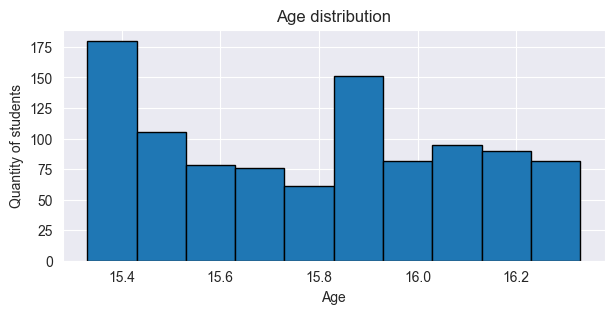

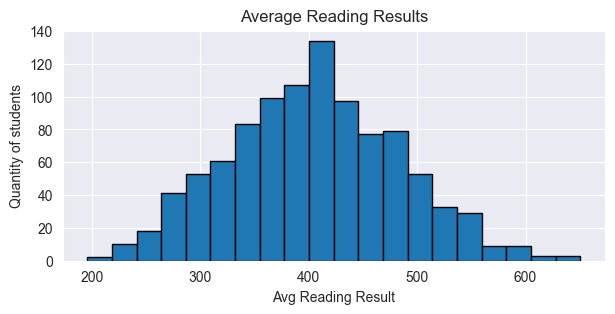

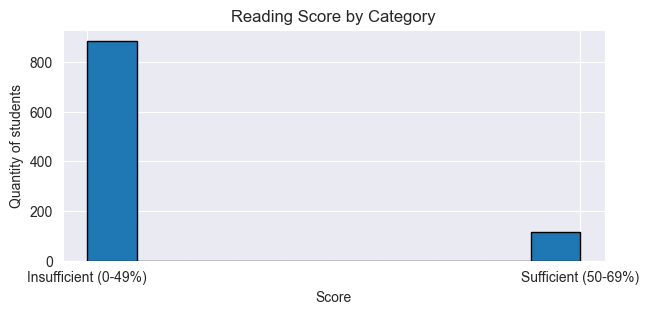

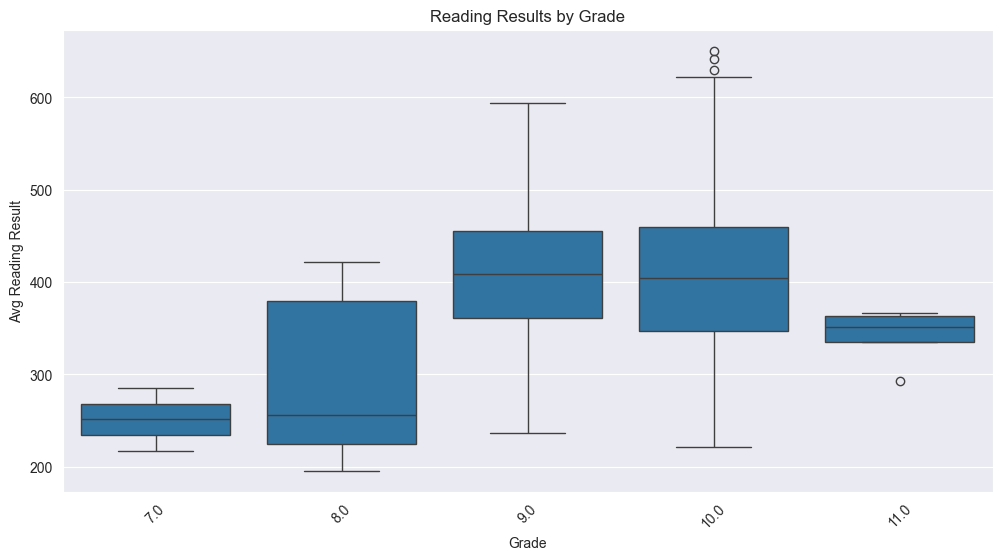

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 3))
plt.hist(student["AGE"], bins=10, edgecolor='black')
plt.title("Age distribution")
plt.ylabel("Quantity of students")
plt.xlabel("Age")
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(student["Avg Reading Result"], bins=20, edgecolor='black')
plt.title("Average Reading Results")
plt.ylabel("Quantity of students")
plt.xlabel("Avg Reading Result")
plt.show()

plt.figure(figsize=(7, 3))
plt.hist(student["Reading Score Category"], edgecolor='black')
plt.title("Reading Score by Category")
plt.ylabel("Quantity of students")
plt.xlabel("Score")
plt.show()

# 11. Relação entre Age_Category e Weight_(kg)
plt.figure(figsize=(12, 6))
# do not include non grade values
sns.boxplot(x='ST001D01T', y="Avg Reading Result", data=student[~student['ST001D01T'].between(90, 100)])
plt.title("Reading Results by Grade")
plt.xlabel("Grade")
plt.ylabel("Avg Reading Result")
plt.xticks(rotation=45)
plt.show()

If we separate the more advanced grades (11th, 12th and 13th) by country, we can clearly observe that the majority of students are English.

This can be justified because of the way that the english teaching system works. See: https://b28mathstutor.co.uk/how-the-english-school-system-works/#:~:text=Unlike%20in%20some%20countries%2C%20students,1%2C%20also%20known%20as%20Infants

This difference may lead to a disproportionate representation of students and we should consider them as an exception in the next phase.

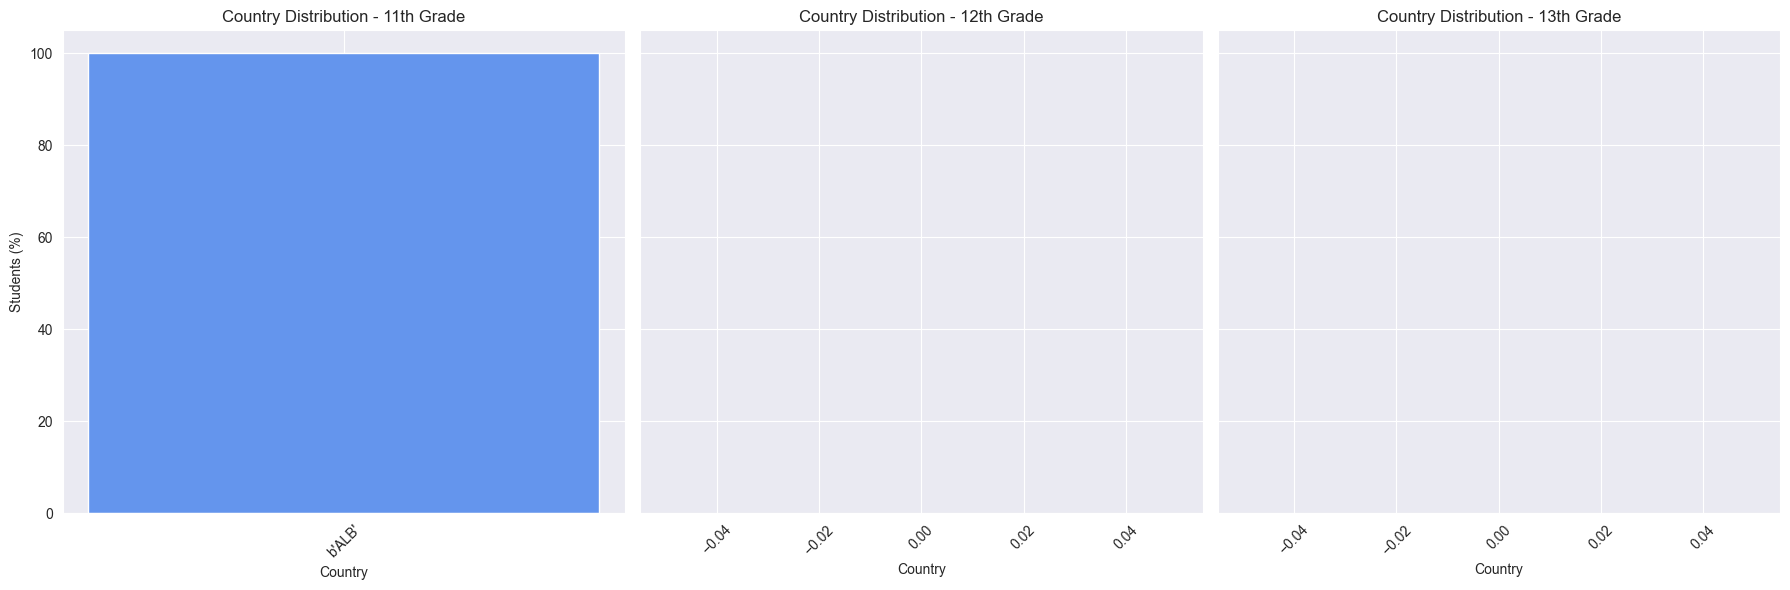

In [176]:
import matplotlib.pyplot as plt

def filter_by_grade(dataframe, grade):
    return dataframe[dataframe["ST001D01T"] == grade]

grade_11 = filter_by_grade(student, 11)
grade_12 = filter_by_grade(student, 12)
grade_13 = filter_by_grade(student, 13)

grade_11_counts = grade_11["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_12_counts = grade_12["CNT"].value_counts(normalize=True).mul(100).head(10)
grade_13_counts = grade_13["CNT"].value_counts(normalize=True).mul(100).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

axes[0].bar(grade_11_counts.index, grade_11_counts.values, color="cornflowerblue")
axes[0].set_title("Country Distribution - 11th Grade")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Students (%)")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(
    0, max(grade_11_counts.max(), grade_12_counts.max(), grade_13_counts.max()) + 5
)

axes[1].bar(grade_12_counts.index, grade_12_counts.values, color="mediumseagreen")
axes[1].set_title("Country Distribution - 12th Grade")
axes[1].set_xlabel("Country")
axes[1].tick_params(axis="x", rotation=45)

axes[2].bar(grade_13_counts.index, grade_13_counts.values, color="tomato")
axes[2].set_title("Country Distribution - 13th Grade")
axes[2].set_xlabel("Country")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


It is also essential to examine the correlation between all dataset features and the target variable (Avg Reading Result). This helps identify which features are strongly associated with students performance and can be considered in the next step for feature selection.

We computed this correlation, and the top 20 features were visualized in a table.

In [177]:
correl = (
    student.corr(numeric_only=True)["Avg Reading Result"]
    .abs()
    .sort_values(ascending=False)
)

Correlation top features based on "Avg Reading Result"

In [178]:
top_corr = correl.drop("Avg Reading Result").head(30)

top_corr_df = top_corr.reset_index()

top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")

top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)


,Feature,Correlation with Reading Result,Description
0,ST197Q01HA,0.394618,How informed are you about the following topic...
1,ST196Q02HA,0.378692,How easy to perform on your own: Explain how c...
2,UNDREM,0.376334,Meta-cognition: understanding and remembering
3,BSMJ,0.370646,Students expected occupational status (SEI)
4,ST225Q06HA,0.366658,Do you expect to complete? <ISCED level 5A or 6>
5,ST177Q01HA,0.356986,How many languages [...] do you and your paren...
6,SCREADDIFF,0.350746,Self-concept of reading: Perception of difficu...
7,ST161Q06HA,0.349601,Agree: I have always had difficulty with reading.
8,GCAWARE,0.349319,Student's awareness of global issues (WLE)
9,ATTIMM,0.348397,Student's attitudes towards immigrants (WLE)


**Correlation of reading by score category**

Correlation only for students in "Very Good (90-100%)" category

In [179]:
correl = student[student["Reading Score Category"] == "Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

#plt.figure(figsize=(14,14))
#sns.heatmap(corr);

,Feature,Correlation with Reading Result,Description
0,CNTRYID,NaN,Country Identifier
1,CNTSCHID,NaN,Intl. School ID
2,CNTSTUID,NaN,Intl. Student ID
3,OECD,NaN,OECD country
4,ADMINMODE,NaN,Mode of Respondent
5,LANGTEST_QQQ,NaN,Language of Questionnaire
6,LANGTEST_COG,NaN,Language of Assessment
7,LANGTEST_PAQ,NaN,Language of Assessment (PAQ)
8,BOOKID,NaN,Form Identifier
9,ST001D01T,NaN,Student International Grade (Derived)


Correlation only for students in "Good (70-89%)" category

In [180]:
correl = student[student["Reading Score Category"] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,CNTRYID,NaN,Country Identifier
1,CNTSCHID,NaN,Intl. School ID
2,CNTSTUID,NaN,Intl. Student ID
3,OECD,NaN,OECD country
4,ADMINMODE,NaN,Mode of Respondent
5,LANGTEST_QQQ,NaN,Language of Questionnaire
6,LANGTEST_COG,NaN,Language of Assessment
7,LANGTEST_PAQ,NaN,Language of Assessment (PAQ)
8,BOOKID,NaN,Form Identifier
9,ST001D01T,NaN,Student International Grade (Derived)


Correlation only for students in "Sufficient (50-69%)" category


In [181]:
correl = student[student["Reading Score Category"] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,LANGFATHER,0.965996,Language spoken with their father for students...
1,LANGMOTHER,0.965996,Language spoken with their mother for students...
2,LANGFRIEND,0.965855,Language spoken with their best friend for stu...
3,LANGSIBLINGS,0.965855,Language spoken with their brother(s) and/or s...
4,EC162Q03HA,0.336521,Why didn't you study before or after school? T...
5,ST006Q02TA,0.309075,Does your mother have this qualification? <ISC...
6,EC012Q04NA,0.308273,Why do you attend additional instruction in <t...
7,EC012Q01NA,0.307788,Why do you attend additional instruction in <t...
8,IC152Q09HA,0.297546,Digital device used for learning or teaching d...
9,EC012Q06NA,0.284588,Why do you attend additional instruction in <t...


Correlation only for students in "Insufficient (0-49%)" category

In [182]:
correl = student[student["Reading Score Category"] == "Insufficient (0-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC162Q02HA,0.405287,Why didn't you study before or after school? I...
1,GCAWARE,0.336460,Student's awareness of global issues (WLE)
2,ST197Q01HA,0.332943,How informed are you about the following topic...
3,ST197Q09HA,0.331377,How informed are you about the following topic...
4,ST161Q06HA,0.325886,Agree: I have always had difficulty with reading.
5,BSMJ,0.321454,Students expected occupational status (SEI)
6,ST161Q03HA,0.316530,Agree: I read fluently.
7,SCREADDIFF,0.315302,Self-concept of reading: Perception of difficu...
8,ST164Q05IA,0.314540,Usefulness for understanding and memorising te...
9,ST196Q02HA,0.312771,How easy to perform on your own: Explain how c...


Due to some categories being NaN, instead of comparing with student score, i'm going to compare by classification (meaning for example the best 10% of students are very good, instead of students with score between 900 and 1000)

In [183]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.90)
    good_threshold = int(total_students * 0.70)
    sufficient_threshold = int(total_students * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:sufficient_threshold-1, 'Reading Score Classification'] = 'Insufficient (0-49%)'
    df.loc[sufficient_threshold:good_threshold-1, 'Reading Score Classification'] = 'Sufficient (50-69%)'
    df.loc[good_threshold:very_good_threshold-1, 'Reading Score Classification'] = 'Good (70-89%)'
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 'Very Good (90-100%)'

    return df

student = categorize_reading_students_by_performance(student)

print("Number of students by classification")
print("Very Good (90-100%): ", len(student[student['Reading Score Classification']=="Very Good (90-100%)"]))
print("Good (70-89%): ", len(student[student['Reading Score Classification']=="Good (70-89%)"]))
print("Sufficient (50-69%): ", len(student[student['Reading Score Classification']=="Sufficient (50-69%)"]))
print("Insufficient (0-49%): ", len(student[student['Reading Score Classification']=="Insufficient (0-49%)"]))


Number of students by classification
Very Good (90-100%):  100
Good (70-89%):  200
Sufficient (50-69%):  200
Insufficient (0-49%):  500


Correlation only for students in "Very Good (90-100%)" classification

In [184]:
correl = student[student["Reading Score Classification"]=="Very Good (90-100%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)

top_corr = correl.drop(["Avg Reading Result"]).head(20)

# Convert to DataFrame
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature", "Correlation with Reading Result"]


top_corr_df["Description"] = top_corr_df["Feature"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,ST021Q01TA,0.968163,How old were you when you arrived in <country ...
1,EC162Q05HA,0.578858,Why didn't you study before or after school? I...
2,EC162Q07HA,0.518127,Why didn't you study before or after school? I...
3,EC162Q01HA,0.474717,Why didn't you study before or after school? I...
4,IC152Q05HA,0.458803,Digital device used for learning or teaching d...
5,ST011Q01TA,0.409098,In your home: A desk to study at
6,ST223Q04HA,0.405056,Teachers in your school: They say negative thi...
7,LANGMOTHER,0.381713,Language spoken with their mother for students...
8,IC152Q03HA,0.372112,Digital device used for learning or teaching d...
9,ST204Q05HA,0.369024,Agree: Immigrants should have all the same rig...


Correlation only for students in "Good (70-89%)" classification

In [185]:
correl = student[student['Reading Score Classification'] == "Good (70-89%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,LANGMOTHER,0.704260,Language spoken with their mother for students...
1,LANGFATHER,0.640092,Language spoken with their father for students...
2,ST021Q01TA,0.464745,How old were you when you arrived in <country ...
3,LANGSIBLINGS,0.441797,Language spoken with their brother(s) and/or s...
4,LANGFRIEND,0.417616,Language spoken with their best friend for stu...
5,EC162Q07HA,0.369877,Why didn't you study before or after school? I...
6,ST182Q05HA,0.278067,Agree: Part of the enjoyment I get from doing ...
7,WORKMAST,0.256738,Work mastery (WLE)
8,ST100Q03TA,0.256622,How often during <test language lessons>: The ...
9,ST182Q06HA,0.252510,"Agree: If I am not good at something, I would ..."


Correlation only for students in "Sufficient (50-69%)" classification


In [186]:
correl = student[student['Reading Score Classification'] == "Sufficient (50-69%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,EC162Q08HA,0.805965,Why didn't you study before or after school? O...
1,EC162Q06HA,0.766559,Why didn't you study before or after school? N...
2,EC162Q05HA,0.665280,Why didn't you study before or after school? I...
3,LANGSCHMATES,0.504599,Language spoken with their school mates for st...
4,EC162Q02HA,0.499334,Why didn't you study before or after school? I...
5,LANGFATHER,0.483643,Language spoken with their father for students...
6,LANGFRIEND,0.483146,Language spoken with their best friend for stu...
7,LANGMOTHER,0.483146,Language spoken with their mother for students...
8,LANGSIBLINGS,0.404926,Language spoken with their brother(s) and/or s...
9,EC162Q01HA,0.309334,Why didn't you study before or after school? I...


Correlation only for students in "Insufficient (0-49%)" classification


In [187]:
correl = student[student['Reading Score Classification'] == "Insufficient (0-49%)"].corr(numeric_only=True)["Avg Reading Result"].abs().sort_values(ascending=False)
top_corr = correl.drop("Avg Reading Result").head(20)
top_corr_df = top_corr.reset_index()
top_corr_df["Description"] = top_corr_df["index"].map(lambda code: data_map.map_enum[code].value if code in data_map.map_enum.__members__ else "Description not found")
top_corr_df.columns = ["Feature", "Correlation with Reading Result", "Description"]
display(top_corr_df)

,Feature,Correlation with Reading Result,Description
0,LANGSCHMATES,0.334580,Language spoken with their school mates for st...
1,ST011Q07TA,0.288619,In your home: Classic literature (e.g. <Shakes...
2,ST196Q02HA,0.270786,How easy to perform on your own: Explain how c...
3,ST013Q01TA,0.260477,How many books are there in your home?
4,ST197Q01HA,0.258121,How informed are you about the following topic...
5,ST225Q06HA,0.256704,Do you expect to complete? <ISCED level 5A or 6>
6,IC008Q08TA,0.245152,Use digital devices outside of school: Browsin...
7,METASUM,0.241183,Meta-cognition: summarising
8,DISCRIM,0.232882,Discriminating school climate (WLE)
9,ESCS,0.231859,"Index of economic, social and cultural status"


## 2.4 Verify data quality


In [189]:
print("\n--- Missing Values ---")
missing = student.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0.7])


--- Missing Values ---
WB153Q03HA    1.000
FL153Q01HA    1.000
FL165Q03HA    1.000
FL165Q04HA    1.000
FL166Q01HA    1.000
              ...  
EC162Q03HA    0.932
EC162Q04HA    0.931
EC162Q05HA    0.931
EC162Q01HA    0.929
ST021Q01TA    0.924
Length: 350, dtype: float64
